<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0-beta/css/bootstrap.min.css" integrity="sha384-/Y6pD6FV/Vv2HJnA6t+vslU6fwYXjCFtcEpHbNJ0lyAFsXTsjBbfaDjzALeQsN6M" crossorigin="anonymous">

<div class="jumbotron">
  <h1 class="display-3">The Big Kahuna Burger</h1>
  <p class="lead">A completely fun and useless analysis of cusswords and blood in Tarantino's movies.</p>
  <hr class="my-4">

</div>

This has been created as part of the project for the Data Storytelling chapter of my Springboard course

One of my favorite way to spend an evening is by watching a movie. The combination of a good movie, my living room couch, a couple of beers and a good [biriyani](https://en.wikipedia.org/wiki/Biryani) has the highest entertainment quotient in my books, it can never be beat. In my view, Tarantino is among the few excellent directors who can create a very good entertainer, a complete package, there will rarely be a scene in his movie that I don’t find enjoyable. Being such a fan of Tarantino, I did not think twice when I found the below extensive data on blood and cuss words from all of his movies so far. 

https://github.com/fivethirtyeight/data/blob/master/tarantino/README.md

In this notebook, i try to explore this data, see if there is any pattern, trend or any intellectual conspiracy. I am sure that the result of this is going to have absolutely zero real world value :).

In [233]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
df=pd.read_csv("./tarantino.csv")
df['minute']=df['minutes_in'].astype('int')
df['type_word']=(df.type=='word').astype('int')
df['type_death']=(df.type=='death').astype('int')

In [353]:
movie_yr_dict={'Reservoir Dogs':1992, 
                'Pulp Fiction':1994, 
                'Kill Bill: Vol. 1':2003,
                'Kill Bill: Vol. 2':2004,
                'Inglorious Basterds':2009, 
                'Django Unchained':2012,
                'Jackie Brown':1997}

In [368]:
df['movie_yr']=df['movie']
df=df.replace({'movie_yr':movie_yr_dict})

In [369]:
df.head()

,movie,type,word,minutes_in,minute,type_word,type_death,movie_yr
0,Reservoir Dogs,word,dick,0.40,0,1,0,1992
1,Reservoir Dogs,word,dicks,0.43,0,1,0,1992
2,Reservoir Dogs,word,fucked,0.55,0,1,0,1992
3,Reservoir Dogs,word,fucking,0.61,0,1,0,1992
4,Reservoir Dogs,word,bullshit,0.61,0,1,0,1992


> <h3>Has he made his movies become more cleaner over the years? Or, has he amped up the cusswords and made them more bloody?</h3>

In [444]:
#Gather total cusswords per movie
movie_avgs=pd.DataFrame(df[(df.type_word==1)][['movie_yr','movie']].groupby(['movie_yr','movie']).size())

In [445]:
#make movie_yr and movie as one of the columns of the DataFrame
movie_avgs=movie_avgs.reset_index()

In [446]:
#rename the columns
movie_avgs.columns = ['movie_yr','movie','tot_cuss_words']

In [447]:
#get the movie length
movie_avgs['movie_length']=(df[(df.type_word==1)][['movie_yr','movie','minutes_in']].groupby(['movie_yr','movie'])['minutes_in'].max()).values

In [448]:
#get the total bleed count
movie_avgs['bleed_count']=(df[(df.type_word==0)][['movie_yr','movie']].groupby(['movie_yr','movie']).size()).values

In [449]:
#Get the average cusswords - words per minute
#get the average blood scenes - scenes per hour
movie_avgs['avg_cw']=movie_avgs.tot_cuss_words/movie_avgs.movie_length
movie_avgs['avg_blood']=(movie_avgs.bleed_count/movie_avgs.movie_length)*60

In [450]:
movie_avgs.head()

,movie_yr,movie,tot_cuss_words,movie_length,bleed_count,avg_cw,avg_blood
0,1992,Reservoir Dogs,421,95.33,10,4.416238,6.293926
1,1994,Pulp Fiction,469,148.15,7,3.165710,2.834965
2,1997,Jackie Brown,368,142.97,4,2.573967,1.678674
3,2003,Kill Bill: Vol. 1,57,100.10,63,0.569431,37.762238
4,2004,Kill Bill: Vol. 2,69,119.58,11,0.577020,5.519318


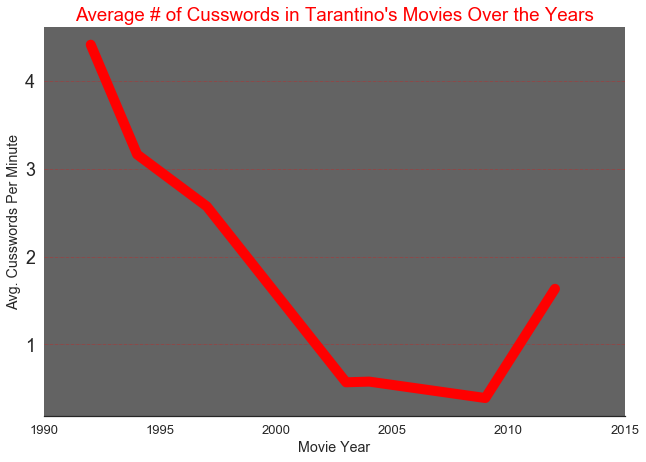

In [533]:
fig, ax = plt.subplots()
ax.set_facecolor(color='#636363')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("Average # of Cusswords in Tarantino's Movies Over the Years", fontsize='large',color='r')
plt.ylabel('Avg. Cusswords Per Minute')
plt.xlabel('Movie Year')
plt.yticks([1,2,3,4],fontsize=18)
plt.grid(True, 'major', 'y', ls='-.', lw=.5, c='r', alpha=.5)
plt.xlim(1990,2015)

line=plt.plot(movie_avgs.movie_yr,movie_avgs.avg_cw,color='r',linewidth=10)

plt.show()

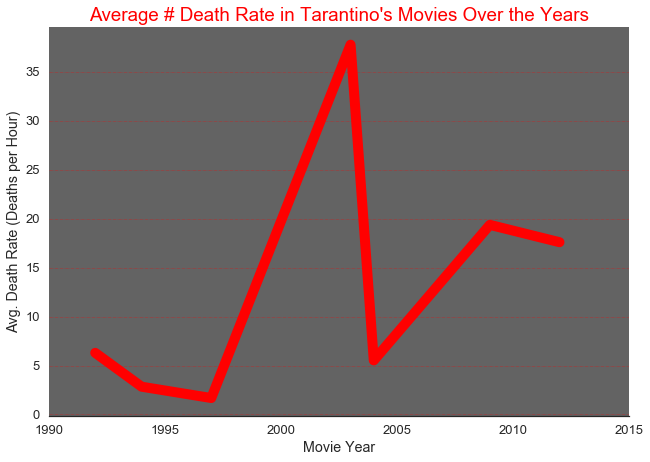

In [538]:
fig, ax = plt.subplots()
ax.set_facecolor(color='#636363')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("Average # Death Rate in Tarantino's Movies Over the Years", fontsize='large',color='r')
plt.ylabel('Avg. Death Rate (Deaths per Hour)')
plt.xlabel('Movie Year')
#plt.yticks([1,2,3,4],fontsize=18)
plt.grid(True, 'major', 'y', ls='-.', lw=.5, c='r', alpha=.5)
plt.xlim(1990,2015)

plt.plot(movie_avgs.movie_yr,(movie_avgs.bleed_count/movie_avgs.movie_length)*60,color='r',linewidth=10)
plt.show()

<div class="alert alert-success" role="alert">
  <hr>
  <p>Looks like Tarantino has dialed down the number of cusswords in his movies, however, i think his movies are as much enjoyable as it has been. And, the number of deaths in his movies have increased. So, is he compensating for reduction in cusswords by making the movie more bloody?</p>
  <hr>
</div>

> <h3>Lets see if there is a particular trend in when the cusswords appear in the movies</h3>

In [556]:
#setup the color and other display properties of the chart
def hist_chart_style():
    sns.set(style="white", context="talk")
    f, axx = plt.subplots(1, 1, figsize=(15, 3))
    axx.set_facecolor(color='k')
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['left'].set_visible(False)
    axx.set_title('Cussword Distribution Across All Tarantino Movies',family='serif',fontsize='large')
    axx.set_ylabel('# of words',fontsize='small',color='k',alpha=0.6)
    axx.set_xlabel('Minute into the movie',fontsize='small',color='k',alpha=0.6)
    axx.set_xlim(-2,162)
    plt.grid(color='#f7f7f7', linestyle='--', axis='y',linewidth=0.5)
    return axx

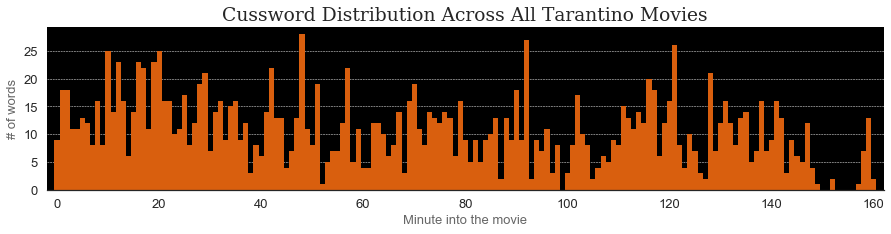

In [562]:
#create a histogram of cusswords across all Tarantino's movies

#get the 'minute_in' for all the cusswords
data = df[(df.type_word==1)]['minute']
d = np.diff(np.unique(data)).min()
#setup the left and right of the bins
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2

#create the chart
ax1=hist_chart_style()
ax1.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d),histtype='stepfilled',facecolor='#d95f0e')
ax1.set_title('Cussword Distribution Across All Tarantino Movies',family='serif',fontsize='large')
plt.show()

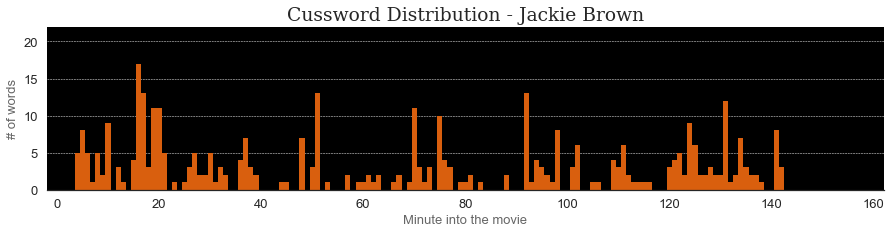

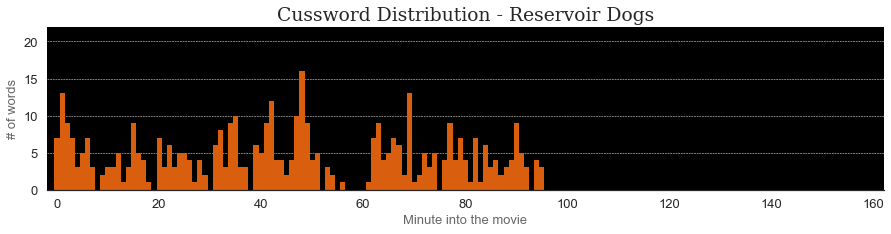

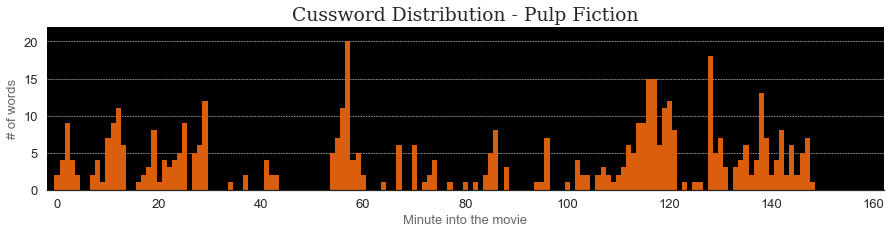

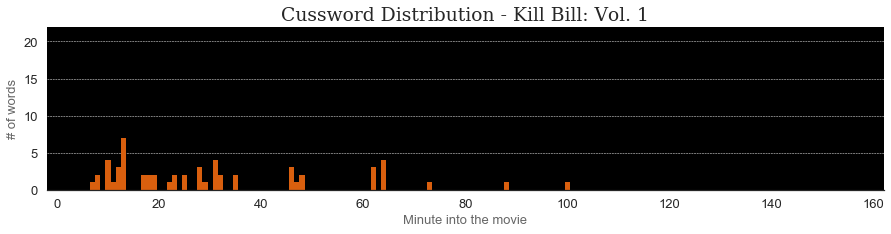

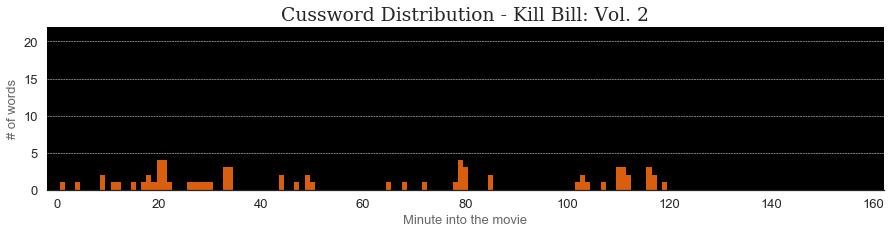

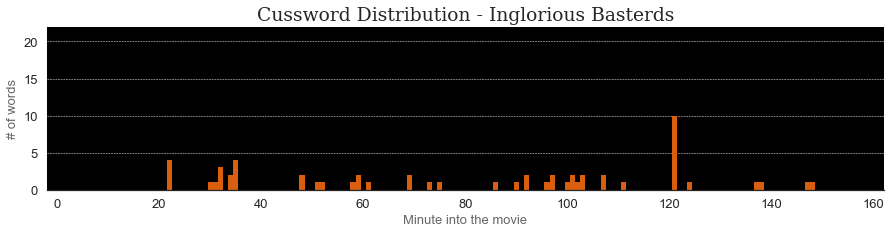

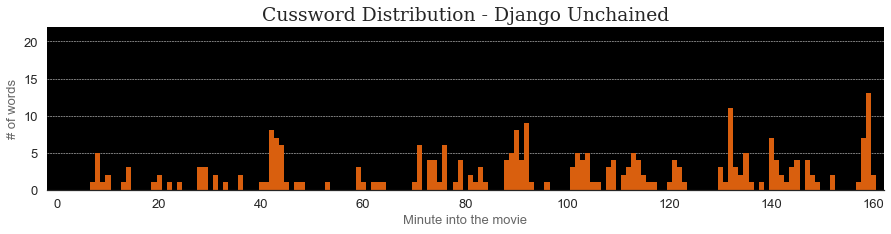

In [563]:
#create a histogram of cusswords across each movie- ordered by the year it was made

#1. chart of Jackie Brown -1997
data_jb = df[(df.type_word==1) & (df.movie=='Jackie Brown')]['minute']
d_jb = np.diff(np.unique(data_jb)).min()
left_of_first_bin_jb = data_jb.min() - float(d_jb)/2
right_of_last_bin_jb = data_jb.max() + float(d_jb)/2
ax2=hist_chart_style()
ax2.hist(data_jb, np.arange(left_of_first_bin_jb, right_of_last_bin_jb + d_jb, d_jb),histtype='stepfilled',facecolor='#d95f0e')
ax2.set_title('Cussword Distribution - Jackie Brown',family='serif',fontsize='large')
ax2.set_ylim(0,22)

#2. Chart of Reservoir Dogs - 1992
data_rd = df[(df.type_word==1) & (df.movie=='Reservoir Dogs')]['minute']
d_rd = np.diff(np.unique(data_rd)).min()
left_of_first_bin_rd = data_rd.min() - float(d_rd)/2
right_of_last_bin_rd = data_rd.max() + float(d_rd)/2
ax2=hist_chart_style()
ax2.hist(data_rd, np.arange(left_of_first_bin_rd, right_of_last_bin_rd + d_rd, d_rd),histtype='stepfilled',facecolor='#d95f0e')
ax2.set_title('Cussword Distribution - Reservoir Dogs',family='serif',fontsize='large')
ax2.set_ylim(0,22)

#3. Chart of Pulp Fiction - 1994
data_pf = df[(df.type_word==1) & (df.movie=='Pulp Fiction')]['minute']
d_pf = np.diff(np.unique(data_pf)).min()
left_of_first_bin_pf = data_pf.min() - float(d_pf)/2
right_of_last_bin_pf = data_pf.max() + float(d_pf)/2
ax2=hist_chart_style()
ax2.hist(data_pf, np.arange(left_of_first_bin_pf, right_of_last_bin_pf + d_pf, d_pf),histtype='stepfilled',facecolor='#d95f0e')
ax2.set_title('Cussword Distribution - Pulp Fiction',family='serif',fontsize='large')
ax2.set_ylim(0,22)

#4. Kill Bill: Vol 1 - 2003
data_kb1 = df[(df.type_word==1) & (df.movie=='Kill Bill: Vol. 1')]['minute']
d_kb1 = np.diff(np.unique(data_kb1)).min()
left_of_first_bin_kb1 = data_kb1.min() - float(d_kb1)/2
right_of_last_bin_kb1 = data_kb1.max() + float(d_kb1)/2
ax2=hist_chart_style()
ax2.hist(data_kb1, np.arange(left_of_first_bin_kb1, right_of_last_bin_kb1 + d_kb1, d_kb1),histtype='stepfilled',facecolor='#d95f0e')
ax2.set_title('Cussword Distribution - Kill Bill: Vol. 1',family='serif',fontsize='large')
ax2.set_ylim(0,22)

#5. Kill Bill: Vol 2 - 2004
data_kb2 = df[(df.type_word==1) & (df.movie=='Kill Bill: Vol. 2')]['minute']
d_kb2 = np.diff(np.unique(data_kb2)).min()
left_of_first_bin_kb2 = data_kb2.min() - float(d_kb2)/2
right_of_last_bin_kb2 = data_kb2.max() + float(d_kb2)/2
ax2=hist_chart_style()
ax2.hist(data_kb2, np.arange(left_of_first_bin_kb2, right_of_last_bin_kb2 + d_kb2, d_kb2),histtype='stepfilled',facecolor='#d95f0e')
ax2.set_title('Cussword Distribution - Kill Bill: Vol. 2',family='serif',fontsize='large')
ax2.set_ylim(0,22)

#6. Inglorious Basterds - 2009
data_ib = df[(df.type_word==1) & (df.movie=='Inglorious Basterds')]['minute']
d_ib = np.diff(np.unique(data_ib)).min()
left_of_first_bin_ib = data_ib.min() - float(d_ib)/2
right_of_last_bin_ib = data_ib.max() + float(d_ib)/2
ax2=hist_chart_style()
ax2.hist(data_ib, np.arange(left_of_first_bin_ib, right_of_last_bin_ib + d_ib, d_ib),histtype='stepfilled',facecolor='#d95f0e')
ax2.set_title('Cussword Distribution - Inglorious Basterds',family='serif',fontsize='large')
ax2.set_ylim(0,22)

#7. Django Unchained - 2012
data_du = df[(df.type_word==1) & (df.movie=='Django Unchained')]['minute']
d_du = np.diff(np.unique(data_du)).min()
left_of_first_bin_du = data_du.min() - float(d_du)/2
right_of_last_bin_du = data_du.max() + float(d_du)/2
ax2=hist_chart_style()
ax2.hist(data_du, np.arange(left_of_first_bin_du, right_of_last_bin_du + d_du, d_du),histtype='stepfilled',facecolor='#d95f0e')
ax2.set_title('Cussword Distribution - Django Unchained',family='serif',fontsize='large')
ax2.set_ylim(0,22)

plt.show()

<div class="alert alert-success" role="alert">
  <hr>
  <p>It clearly shows that Tarantino did slow down a lot on the 4 letter words quite a bit after Pulp Fiction. Kill Bill movies seem to be the cleanest one in this aspect, could it be because the protagonist was a lady? Sure, Tarantino did make up for this by filling most of the frames with blood in the Kill Bill movies</p>
  <hr>
</div>

> <h3>Lets check if there is any relation between cusswords and blood? Can we predict the cussword rate given the amount of blood?</h3>

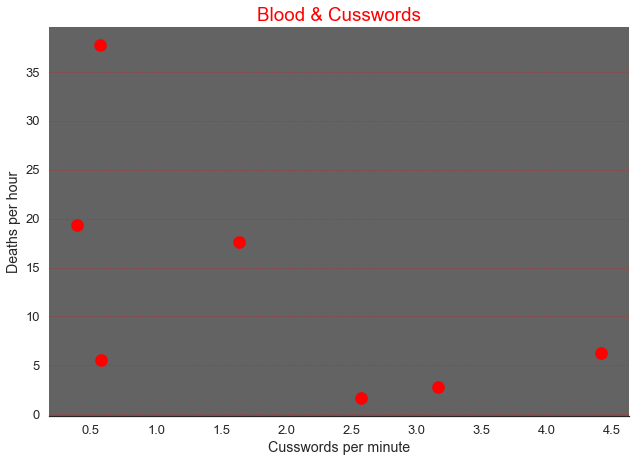

In [575]:
fig, ax = plt.subplots()
ax.set_facecolor(color='#636363')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("Blood & Cusswords", fontsize='large',color='r')
plt.ylabel('Deaths per hour')
plt.xlabel('Cusswords per minute')
plt.grid(True, 'major', 'y', ls='-.', lw=.5, c='r', alpha=.5)

plt.scatter(movie_avgs.avg_cw,movie_avgs.avg_blood,color='r',s=150)
plt.show()

<div class="alert alert-success" role="alert">
  <hr>
  <p>Probably, no clear trend here, but if forced to fit a trend, as the number of cusswords increase, the amount of blood on screen decreases. Come what may, hope Tarantino continues to entertain us all.</p>
  <hr>
</div>